# `make_regression`을 이용한 PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learn에서는 `make_regression` 함수를 이용하여 회귀분석을 연습하기 위한 데이터셋을 만들 수 있다. 이를 이용해서 Principal Component Regression을 연습하는 과제를 진행해보자.



# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

from matplotlib import pyplot as plt
import seaborn as sns

# Q1 `make_regression` 함수로 데이터 생성해보자

독립변수는 X1부터 X10까지, 종속변수는 Y를 생성하자. 표본 크기는 1000으로 설정하고, `noise`, `random_state`, `bias`등의 변수는 자유롭게 설정해보자.

In [2]:
# make_regression로 데이터 생성
X, Y = make_regression(n_samples = 1000, n_features=10, noise = 0.1, bias = 0.1, random_state=1018)

In [3]:
df = pd.DataFrame(X, columns = [f'X{i}' for i in range(1,11)])
df['Y'] = Y
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,-0.093686,-1.027956,-1.174950,-1.874084,-0.675046,1.703458,0.629037,-1.652259,0.085357,-0.206362,-263.713179
1,-0.951446,1.815766,-1.275551,0.766161,0.303708,-0.235070,0.771913,0.992347,-2.001524,-1.762623,-11.048428
2,1.695174,1.459827,-1.180592,2.229611,-1.750796,-0.562704,0.319673,0.402019,-1.049879,0.301789,238.538583
3,0.006192,-0.963427,0.280802,0.164355,0.712038,1.545605,1.216492,-1.173580,0.778934,-1.032659,45.038753
4,-1.091535,-0.134532,-0.001281,2.797307,0.283188,-1.227163,0.762392,0.614568,-2.132225,1.647629,104.750184


# Q2 EDA를 해보자

각 변수별 히스토그램, scatterplot matrix, correlation matrix, 요약통계량(descriptive statistics)를 그려보자


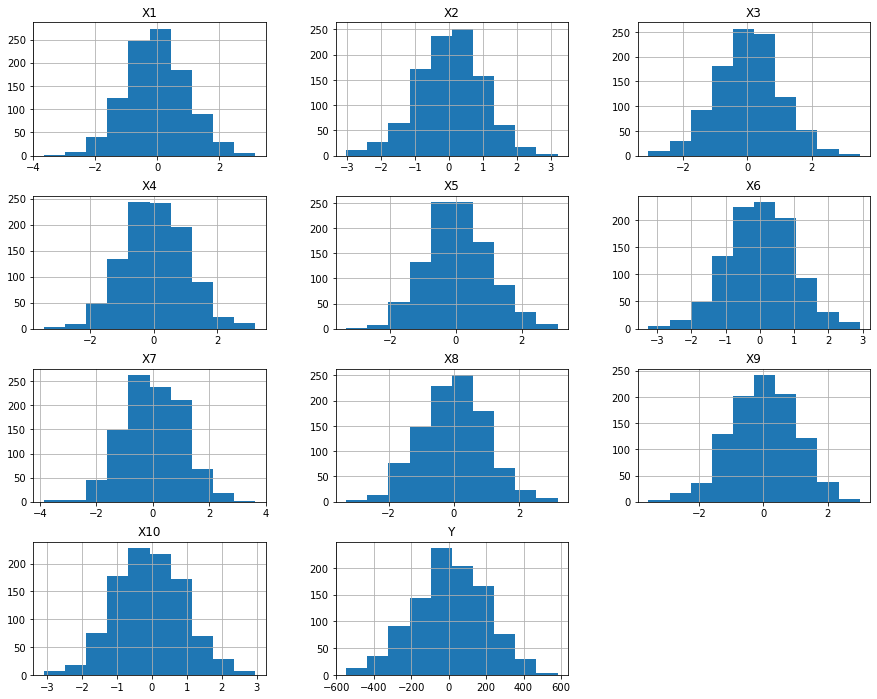

In [4]:
# 히스토그램
df.hist(figsize = (15,12)) ; plt.show()

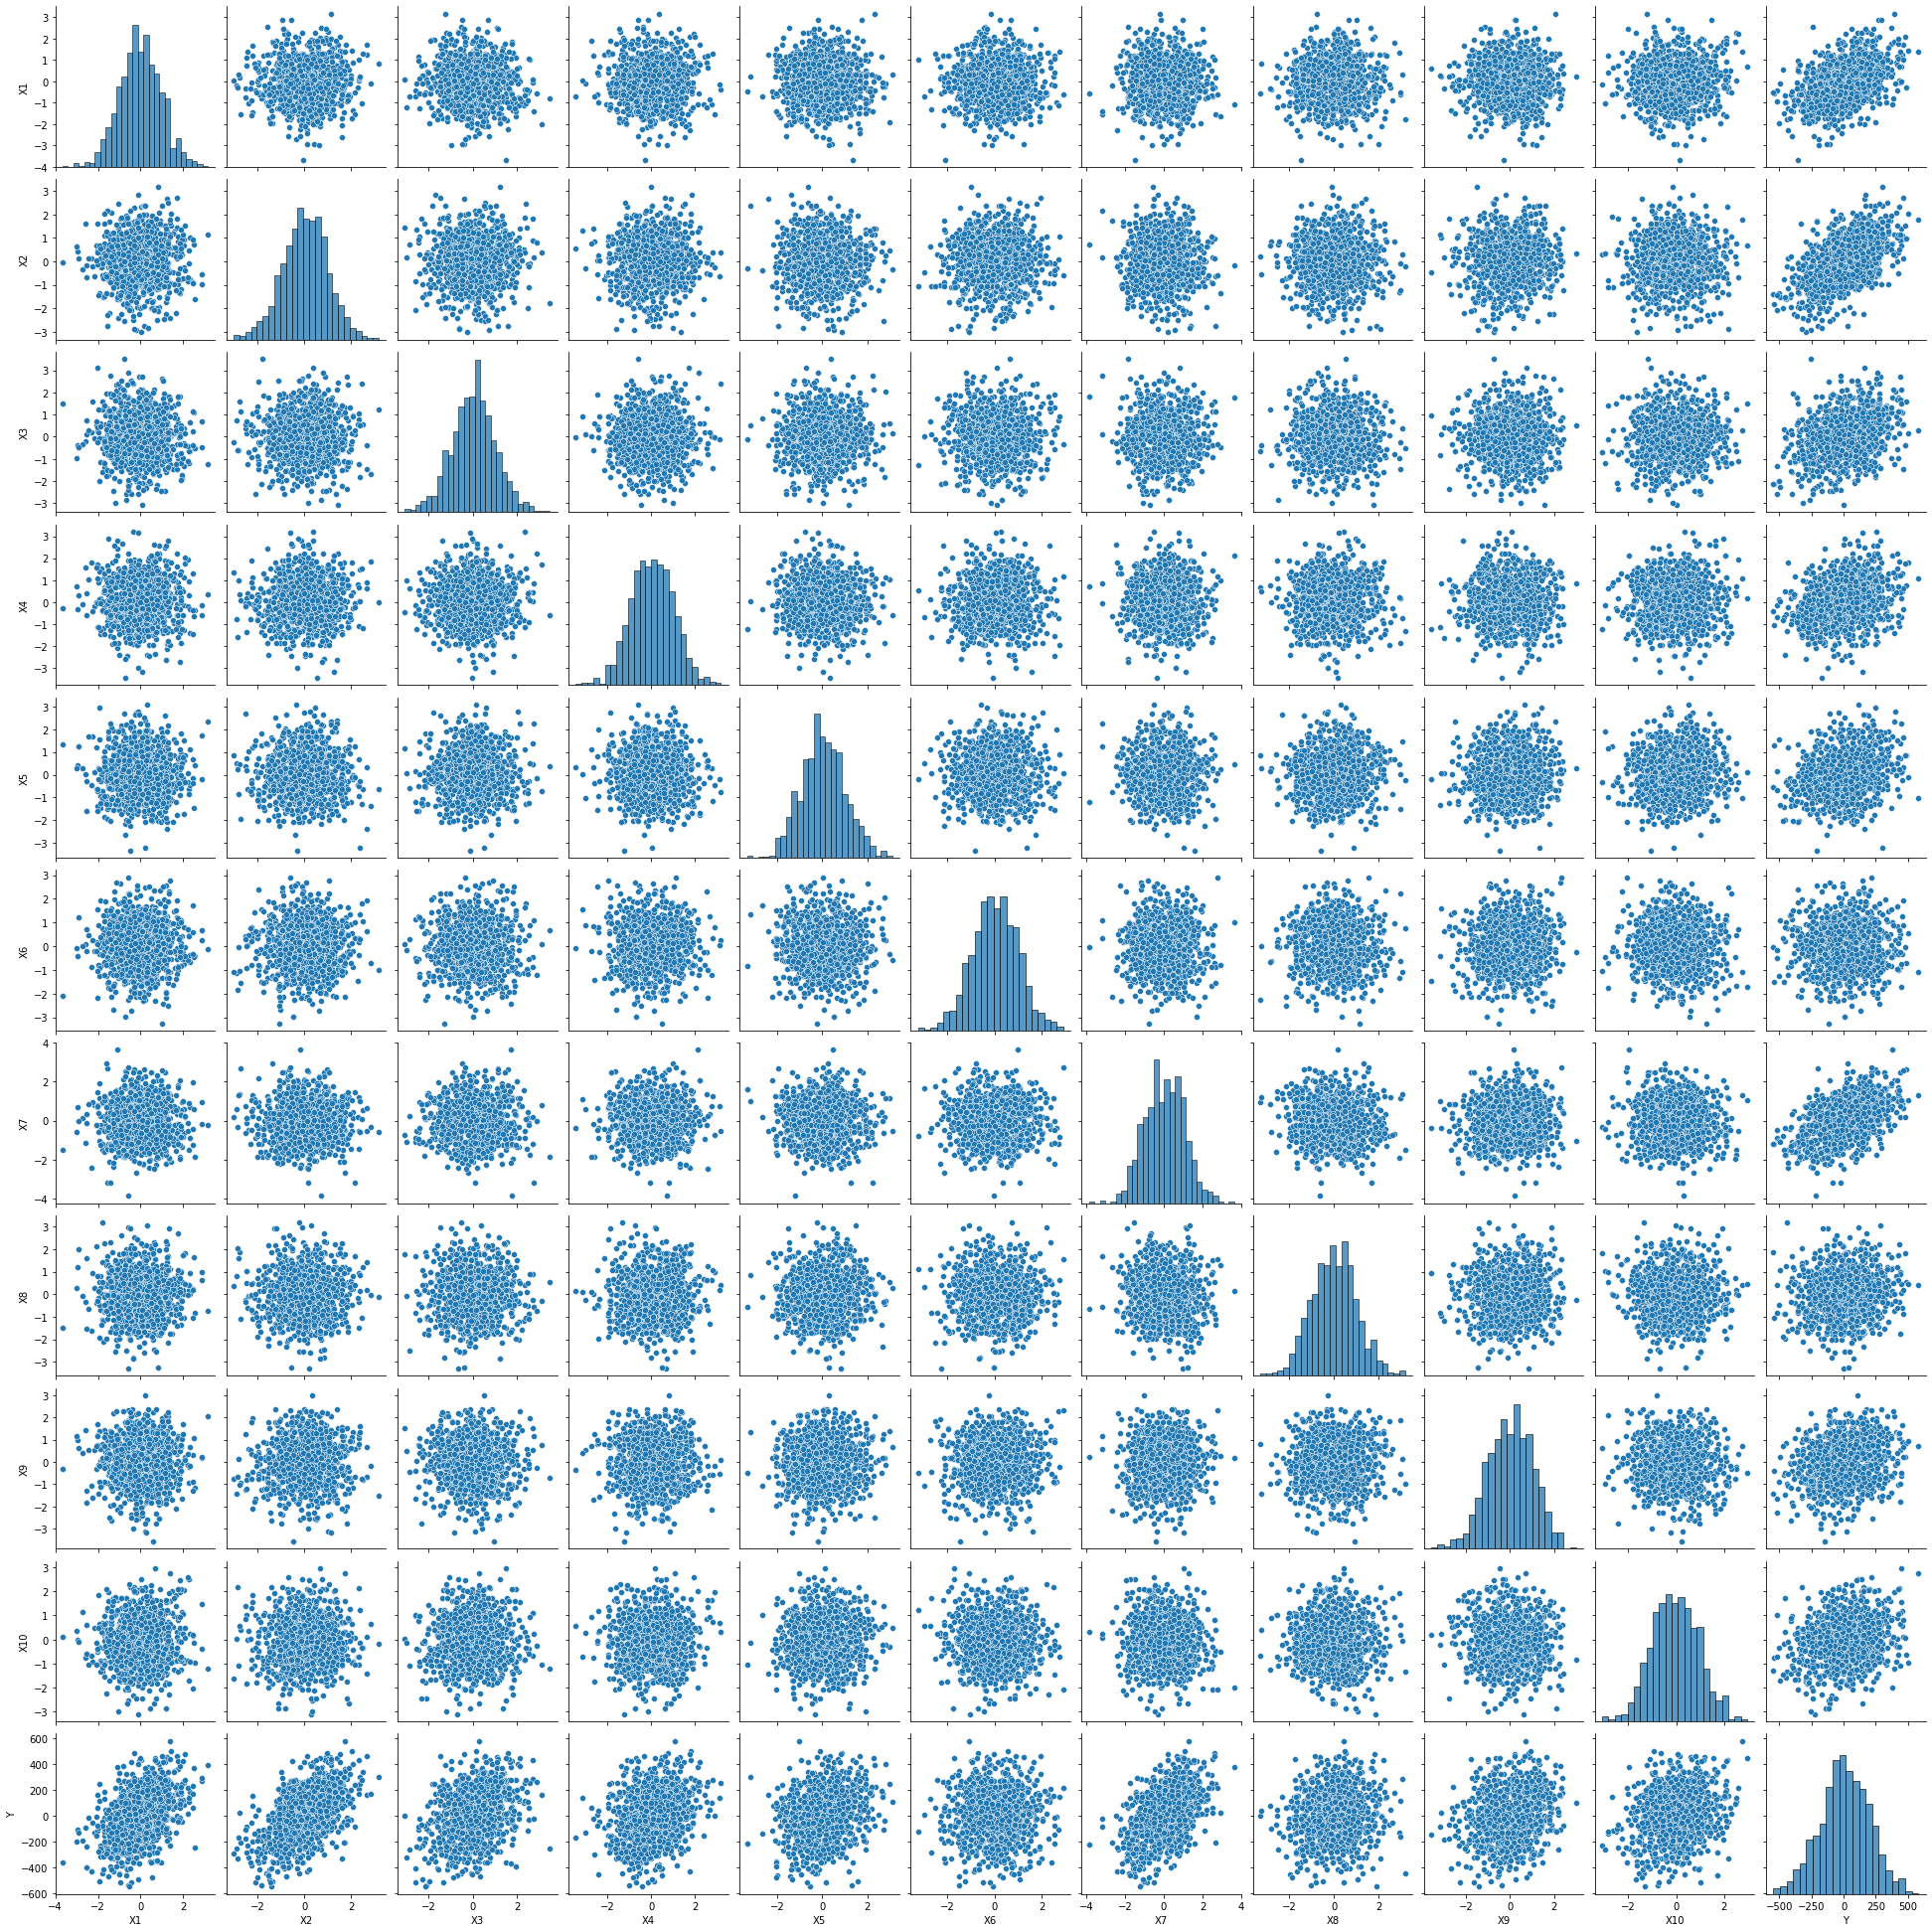

In [5]:
# Scatterplot matrix
sns.pairplot(df) ; plt.show()

In [6]:
# Correlation matrix
df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
X1,1.00,0.05,-0.05,-0.00,-0.00,-0.01,-0.00,-0.01,0.01,0.03,0.44
X2,0.05,1.00,-0.01,0.06,0.00,-0.00,-0.01,0.01,0.03,0.02,0.52
X3,-0.05,-0.01,1.00,-0.01,0.02,-0.01,0.02,0.01,-0.01,0.01,0.32
X4,-0.00,0.06,-0.01,1.00,-0.03,-0.02,0.02,0.03,-0.01,0.01,0.27
X5,-0.00,0.00,0.02,-0.03,1.00,-0.03,0.00,0.07,0.04,0.06,0.25
X6,-0.01,-0.00,-0.01,-0.02,-0.03,1.00,0.00,-0.01,0.05,-0.05,0.02
X7,-0.00,-0.01,0.02,0.02,0.00,0.00,1.00,-0.06,0.04,-0.07,0.47
X8,-0.01,0.01,0.01,0.03,0.07,-0.01,-0.06,1.00,0.03,0.00,0.10
X9,0.01,0.03,-0.01,-0.01,0.04,0.05,0.04,0.03,1.00,-0.05,0.23
X10,0.03,0.02,0.01,0.01,0.06,-0.05,-0.07,0.00,-0.05,1.00,0.24


In [7]:
# 요약 통계량
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.014226,0.027956,0.035401,0.055153,0.041491,0.030749,0.019193,-0.003222,0.001375,-0.047233,7.921336
std,0.971448,0.973182,0.998189,0.993997,0.974250,0.974737,1.028263,1.008598,1.022757,0.976967,192.498638
min,-3.658900,-3.023029,-3.082093,-3.454662,-3.333388,-3.249440,-3.867199,-3.301564,-3.573057,-3.090325,-547.758809
25%,-0.647941,-0.588551,-0.603663,-0.631615,-0.617329,-0.623962,-0.674834,-0.682780,-0.710845,-0.735315,-113.620670
50%,-0.044958,0.057520,0.047597,0.046920,0.012334,0.011662,0.036009,-0.001665,0.049733,-0.078572,6.748831
75%,0.648069,0.678643,0.662337,0.739144,0.662646,0.720978,0.767229,0.654777,0.740208,0.637643,144.562622
max,3.163705,3.198440,3.501867,3.205513,3.091549,2.912956,3.634953,3.180901,2.996048,2.963813,581.655358


# Q3 `StandardScaler` 로 scaling을 해보자

X 변수들에 대해 `StandarScaler`를 이용하여 표준화를 해보자.
PCA를 하기 전에 스케일링을 한다는 점을 유의하자.

In [8]:
from sklearn.preprocessing import StandardScaler

# 스케일링하기
scaler = StandardScaler()
df.loc[:,df.columns.str.contains('X')] = scaler.fit_transform(df.loc[:,df.columns.str.contains('X')])

# Q4 `PCA`를 해보자

`PCA` 함수를 이용하여 PCA를 해보자. 또 다음을 해보자.

- PC1 부터 PC10 까지 Scree plot을 그려보자
- PC1과 PC2를 가지고 scatterplot을 그려보자.

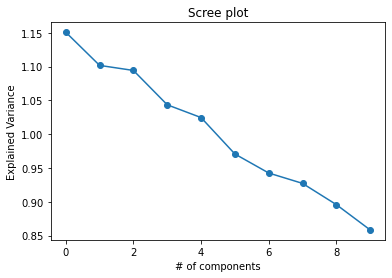

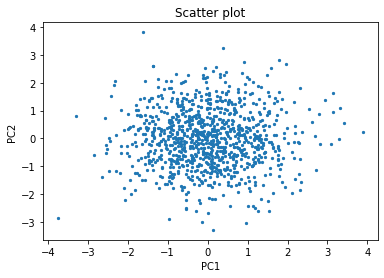

In [9]:
from sklearn.decomposition import PCA

# PCA 계산하기
pca = PCA(n_components = 10)
df_pca = pca.fit_transform(df[df.columns[:-1]])
pca_pred = pd.DataFrame(df_pca)
pca_pred = pd.concat([pca_pred, df['Y']], axis=1)


# Scree plot 그리기
plt.title('Scree plot')
plt.xlabel('# of components')
plt.ylabel('Explained Variance')
plt.plot(pca.explained_variance_,'o-')
plt.show()

# PC1 와 PC2 산점도 그리기
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_pred[0],pca_pred[1],s=5)
plt.show()


In [10]:
pca.explained_variance_ratio_

array([0.11497113, 0.11007025, 0.10932458, 0.10424759, 0.10235964,
       0.09697782, 0.09416632, 0.09263272, 0.0894948 , 0.08575515])

# Q5 `train_test_split`을 해보자

Train set과 Test set을 6:4 비율로 나눠보자

In [11]:
from sklearn.model_selection import train_test_split

# train set과 test set 나누기
x_tr, x_te, y_tr, y_te = train_test_split(pca_pred[pca_pred.columns[:-1]],pca_pred[pca_pred.columns[-1]], random_state = 1018, train_size = 0.6)

#  Q6 Principal Component Regression을 진행해보자.

Q5에서 만든 데이터로부터 다음의 과정으로 문제를 풀어보자.
- Y를 종속변수(`y_train`), `X_train`의 PC1을 종속변수로 하여 Linear Regression을 적합한다.
- `y_pred`과 `y_train`을 비교하여 train error의 MSE를 구한다.
- Principal component을 하나 늘려 Linear regression을 적합한다. 즉 Y에 대해 PC1, PC2으로 Linear Regression을 적합한다.
- 마찬가지로 train error의 MSE를 구한다.
- PC10까지 같은 과정을 반복하고, MSE를 비교한다.



In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train MSE 저장
mse_train = []
for i in range(0,10):
  lr = LinearRegression()
  lr.fit(x_tr.loc[:,0:i],y_tr)
  y_pred = lr.predict(x_tr.loc[:,0:i])
  mse = mean_squared_error(y_tr, y_pred)
  mse_train.append(mse)

# 회귀모형 적합
mse_train



[37336.20509065466,
 26326.443235880535,
 25477.66526644062,
 14235.8219396054,
 6965.8974321020905,
 3435.0565193104662,
 3434.8569385694195,
 1259.8695032616647,
 876.4254965495924,
 0.00967622973726107]

# Q7 Test error을 계산해보자.

위 과정에서 적합한 모형을 바탕으로 `y_test`을 추정하고 `y_test`와의 MSE를 계산하여 test error을 구해보자.

In [13]:
# test MSE 저장
mse_test = []
for i in range(0,10):
  lr = LinearRegression()
  lr.fit(x_tr.loc[:,0:i],y_tr)
  y_pred = lr.predict(x_te.loc[:,0:i])
  mse = mean_squared_error(y_te, y_pred)
  mse_test.append(mse)
  
mse_test

[34567.98384906229,
 23511.75621768738,
 22491.86586692401,
 13223.450477463088,
 8079.059197439323,
 3592.049107040268,
 3593.45691710634,
 1175.2202679598236,
 863.0419996131191,
 0.00998499795196816]